# 🌧️ **Rainfall Prediction with Advanced Machine Learning**

**Author**: [Teerapong (Kao) Panboonyuen](https://kaopanboonyuen.github.io/rainfall-prediction-a-machine-learning-approach/)  
**Project**: *Cutting-Edge ML Techniques for Rainfall Forecasting*  
**License**: [MIT License](https://opensource.org/licenses/MIT)

---

### 📝 **Overview**
This notebook outlines the training loop for our rainfall prediction model. Key functionalities include:

- **Configuration**: Reads parameters from a YAML file.
- **Data Loading**: Prepares the dataset for training.
- **Model Initialization**: Sets up the architecture.
- **Training**: Executes the training process on the specified dataset.

---

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
!ls

 Elevation_coor2.csv	  Landuse.csv		   'Soil types.csv'
 Elevation.csv		 'Rainfall intensity.csv'   Target.csv
 flood_coor2.csv	  sample_data		    test_data2.csv
'Flow accumulation.csv'   Slope.csv		    test_data.csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [ ]:
'''
Elevation.csv
Flow accumulation.csv
Landuse.csv
Rainfall intensity.csv
Slope.csv
Soil types.csv
Target.csv
test_data.csv
'''

Elevation = pd.read_csv("Elevation.csv")
Flow_accumulation = pd.read_csv("Flow accumulation.csv")
Landuse = pd.read_csv("Landuse.csv")
Rainfall_intensity = pd.read_csv("Rainfall intensity.csv")
Slope = pd.read_csv("Slope.csv")
Target = pd.read_csv("Target.csv")

test_data = pd.read_csv("test_data2.csv")
flood_coor = pd.read_csv("flood_coor2.csv")
Elevation_coor = pd.read_csv("Elevation_coor2.csv")

In [ ]:
Elevation.set_index('lon', inplace=True)

In [ ]:
Flow_accumulation.set_index('lon', inplace=True)

In [ ]:
Landuse.set_index('lon', inplace=True)

In [ ]:
Rainfall_intensity.set_index('lon', inplace=True)

In [ ]:
Slope.set_index('lon', inplace=True)

In [ ]:
Target.set_index('lon', inplace=True)

In [ ]:
test_data.set_index('lon', inplace=True)

In [ ]:
#flood_coor.set_index('lon', inplace=True)

In [ ]:
#Elevation_coor.set_index('lon', inplace=True)

In [ ]:
dfs = [Elevation, Flow_accumulation, Landuse, Rainfall_intensity, Slope, Target]

result = pd.concat(dfs)

In [75]:
result.head()

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
lon,,,,,,,
14.222500,NaN,6.0,NaN,NaN,100.243334,NaN,NaN
14.223334,NaN,5.0,NaN,NaN,100.243334,NaN,NaN
14.224167,NaN,8.0,NaN,NaN,100.243334,NaN,NaN
14.225000,NaN,6.0,NaN,NaN,100.243334,NaN,NaN
14.225834,NaN,7.0,NaN,NaN,100.243334,NaN,NaN


In [76]:
result.sample(10)

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
lon,,,,,,,
14.307500,NaN,2.0,NaN,NaN,100.439167,NaN,NaN
14.358334,NaN,9.0,NaN,NaN,100.596667,NaN,NaN
14.308334,NaN,NaN,30.0,NaN,100.402500,NaN,NaN
14.393334,NaN,7.0,NaN,NaN,100.370000,NaN,NaN
14.280834,NaN,5.0,NaN,NaN,100.580000,NaN,NaN
14.254167,NaN,NaN,500.0,NaN,100.402500,NaN,NaN
14.477500,NaN,NaN,NaN,NaN,100.395834,0.711,NaN
14.503334,NaN,6.0,NaN,NaN,100.518334,NaN,NaN
14.441667,NaN,NaN,178.0,NaN,100.640834,NaN,NaN


In [77]:
result.reset_index()

,lon,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
0,14.222500,NaN,6.0,NaN,NaN,100.243334,NaN,NaN
1,14.223334,NaN,5.0,NaN,NaN,100.243334,NaN,NaN
2,14.224167,NaN,8.0,NaN,NaN,100.243334,NaN,NaN
3,14.225000,NaN,6.0,NaN,NaN,100.243334,NaN,NaN
4,14.225834,NaN,7.0,NaN,NaN,100.243334,NaN,NaN
...,...,...,...,...,...,...,...,...
934214,14.338482,NaN,NaN,NaN,NaN,100.724899,NaN,1.0
934215,14.268592,NaN,NaN,NaN,NaN,100.741778,NaN,1.0
934216,14.299228,NaN,NaN,NaN,NaN,100.756537,NaN,1.0
934217,14.325187,NaN,NaN,NaN,NaN,100.758334,NaN,1.0


In [ ]:
#result.fillna(0, inplace = True)

In [79]:
result.shape

(934219, 7)

In [ ]:
#fulldataset = result.dropna(axis=0, subset=['target'])
result.target.fillna(0.0, inplace=True)

In [81]:
result.shape

(934219, 7)

In [82]:
result.head()

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
lon,,,,,,,
14.222500,NaN,6.0,NaN,NaN,100.243334,NaN,0.0
14.223334,NaN,5.0,NaN,NaN,100.243334,NaN,0.0
14.224167,NaN,8.0,NaN,NaN,100.243334,NaN,0.0
14.225000,NaN,6.0,NaN,NaN,100.243334,NaN,0.0
14.225834,NaN,7.0,NaN,NaN,100.243334,NaN,0.0


In [ ]:
result.fillna(result.mean() ,inplace=True)

In [84]:
result.head(15)

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
lon,,,,,,,
14.222500,2727.666667,6.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.223334,2727.666667,5.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.224167,2727.666667,8.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.225000,2727.666667,6.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.225834,2727.666667,7.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.226667,2727.666667,7.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.227500,2727.666667,6.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.228334,2727.666667,6.0,544.027806,6.881292,100.243334,7.355227e+33,0.0
14.229167,2727.666667,6.0,544.027806,6.881292,100.243334,7.355227e+33,0.0


In [85]:
# Count Class 1 and Class 0

result.groupby('target').count()

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope
target,,,,,,
0.0,934027,934027,934027,934027,934027,934027
1.0,192,192,192,192,192,192


In [ ]:
data = result

# Done! We've created the final data.

In [87]:
data.sample(10)

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope,target
lon,,,,,,,
14.300000,2727.666667,5.454903,236.000000,6.881292,100.755000,7.355227e+33,0.0
14.418334,2727.666667,5.454903,544.027806,6.881292,100.644167,1.216000e+00,0.0
14.315000,2727.666667,5.454903,5.000000,6.881292,100.538334,7.355227e+33,0.0
14.405000,2727.666667,4.000000,544.027806,6.881292,100.512500,7.355227e+33,0.0
14.431667,2727.666667,5.454903,7.000000,6.881292,100.315834,7.355227e+33,0.0
14.605000,2727.666667,5.454903,544.027806,6.881292,100.507500,2.510000e-01,0.0
14.485834,2727.666667,5.454903,544.027806,6.881292,100.537500,6.360000e-01,0.0
14.307500,2727.666667,5.454903,544.027806,6.881292,100.785000,5.620000e-01,0.0
14.335834,2727.666667,5.454903,553.000000,6.881292,100.695000,7.355227e+33,0.0


# Let's create neural nets model

In [88]:
data.shape

(934219, 7)

In [89]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data.target==1.0] #I classified negative class as '0'
df_minority = data[data.target==0.0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,       # sample with replacement
                                 n_samples=192,    # to match majority class
                                 random_state=123)   # reproducible results

# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
data.groupby('target').count()

,Rainfall intensity,elevation,flow accumulation,land use,lat,slope
target,,,,,,
0.0,192,192,192,192,192,192
1.0,192,192,192,192,192,192


In [ ]:
data.dropna(axis=0, inplace=True)

X = data.drop('target',axis=1)
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

In [96]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=22, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=12345, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

## Predictions and Evaluation

Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(confusion_matrix(y_test,predictions))

[[ 0 47]
 [ 0 49]]


In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.51      1.00      0.68        49

    accuracy                           0.51        96
   macro avg       0.26      0.50      0.34        96
weighted avg       0.26      0.51      0.34        96



In [101]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        13
         1.0   0.551724  1.000000  0.711111        16

    accuracy                       0.551724        29
   macro avg   0.275862  0.500000  0.355556        29
weighted avg   0.304400  0.551724  0.392337        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

[[ 0 47]
 [ 0 49]]
tn, fp, fn, tp = 0 0 47 49


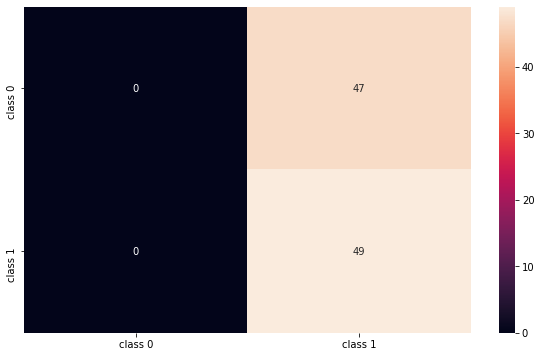

In [102]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

## Model 1: All

In [103]:
data.dropna(axis=0, inplace=True)

X = data.drop('target',axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[ 0 47]
 [ 0 49]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.51      1.00      0.68        49

    accuracy                           0.51        96
   macro avg       0.26      0.50      0.34        96
weighted avg       0.26      0.51      0.34        96



In [104]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        13
         1.0   0.551724  1.000000  0.711111        16

    accuracy                       0.551724        29
   macro avg   0.275862  0.500000  0.355556        29
weighted avg   0.304400  0.551724  0.392337        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

[[ 0 47]
 [ 0 49]]
tn, fp, fn, tp = 0 0 47 49


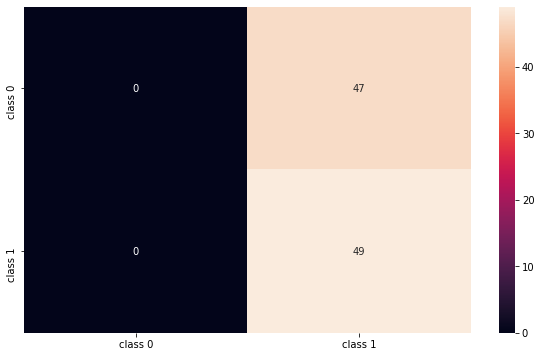

In [105]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

## Model 2: All - Slope

In [106]:
X.columns

Index(['Rainfall intensity', 'elevation', 'flow accumulation', 'land use',
       'lat', 'slope'],
      dtype='object')

In [107]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[39  8]
 [38 11]]
              precision    recall  f1-score   support

         0.0       0.51      0.83      0.63        47
         1.0       0.58      0.22      0.32        49

    accuracy                           0.52        96
   macro avg       0.54      0.53      0.48        96
weighted avg       0.54      0.52      0.47        96



[[39  8]
 [38 11]]
tn, fp, fn, tp = 39 38 8 11


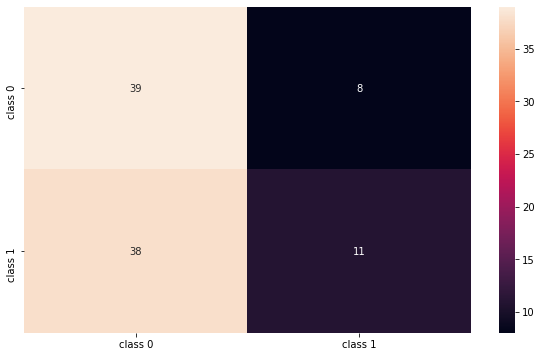

In [108]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [109]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.434783  0.714286  0.540541        14
         1.0   0.333333  0.133333  0.190476        15

    accuracy                       0.413793        29
   macro avg   0.384058  0.423810  0.365508        29
weighted avg   0.382309  0.413793  0.359473        29

              precision    recall  f1-score   support

         0.0   0.473684  0.692308  0.562500        13
         1.0   0.600000  0.375000  0.461538        16

    accuracy                       0.517241        29
   macro avg   0.536842  0.533654  0.512019        29
weighted avg   0.543376  0.517241  0.506797        29

              precision    recall  f1-score   support

         0.0   0.473684  0.642857  0.545455        14
         1.0   0.500000  0.333333  0.400000        15

    accuracy                       0.482759        29
   macro avg   0.486842  0.488095  0.472727        29
weighted avg   0.487296  0.482759  0.470219        29

              preci

## Model 3: All - Slope - Rainfall


In [110]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope','Rainfall intensity'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[ 1 46]
 [ 0 49]]
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        47
         1.0       0.52      1.00      0.68        49

    accuracy                           0.52        96
   macro avg       0.76      0.51      0.36        96
weighted avg       0.75      0.52      0.37        96



[[ 1 46]
 [ 0 49]]
tn, fp, fn, tp = 1 0 46 49


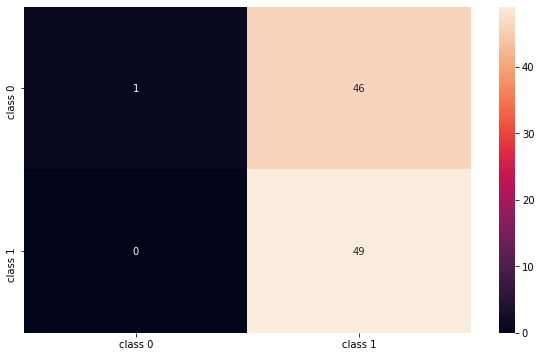

In [111]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [112]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   1.000000  0.071429  0.133333        14
         1.0   0.535714  1.000000  0.697674        15

    accuracy                       0.551724        29
   macro avg   0.767857  0.535714  0.415504        29
weighted avg   0.759852  0.551724  0.425234        29

              precision    recall  f1-score   support

         0.0   1.000000  0.307692  0.470588        13
         1.0   0.640000  1.000000  0.780488        16

    accuracy                       0.689655        29
   macro avg   0.820000  0.653846  0.625538        29
weighted avg   0.801379  0.689655  0.641567        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

## Model 4: All - Slope - Rainfall - Landuse


In [113]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope','Rainfall intensity','land use'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[17 30]
 [ 4 45]]
              precision    recall  f1-score   support

         0.0       0.81      0.36      0.50        47
         1.0       0.60      0.92      0.73        49

    accuracy                           0.65        96
   macro avg       0.70      0.64      0.61        96
weighted avg       0.70      0.65      0.62        96



In [114]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              precision    recall  f1-score   support

         0.0   1.000000  0.076923  0.142857        13
         1.0   0.571429  1.000000  0.727273        16

    accuracy                       0.586207        29
   macro avg   0.785714  0.538462  0.435065        29
weighted avg   0.763547  0.586207  0.465293        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

[[17 30]
 [ 4 45]]
tn, fp, fn, tp = 17 4 30 45


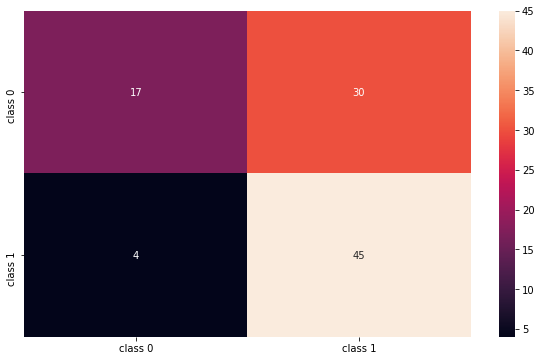

In [115]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)